<a href="https://colab.research.google.com/github/YudyMancipe/Data_Analysis_Portfolio/blob/main/Graduate%20Admission%20Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Nombre**

 Yudy Alexandra Mancipe Diaz


### **Objetivo del Caso de Estudio**

El objetivo principal es predecir la probabilidad de admisión (Chance of Admit) de los estudiantes a programas de posgrado utilizando un modelo de machine learning. Queremos entender qué factores influyen más en la decisión de admisión y cómo mejorar las probabilidades de ser admitido.

**Descripción de las Variables**

● Serial No.: Número de serie o identificador único de cada estudiante. No es
relevante para el análisis predictivo, pero ayuda a identificar cada registro.

● GRE Score: Puntaje en el Graduate Record Examinations (GRE). Un puntaje alto
puede indicar mayor preparación académica.

● TOEFL Score: Puntaje en el Test of English as a Foreign Language (TOEFL).
Importante para estudiantes internacionales.

● University Rating: Calificación de la universidad de procedencia del estudiante. Refleja la reputación académica.

● SOP (Statement of Purpose): Puntaje asignado a la declaración de propósitos.
Evalúa las motivaciones y objetivos del estudiante.

● LOR (Letter of Recommendation): Puntaje de las cartas de recomendación.
Refleja las opiniones de profesores y empleadores sobre el estudiante.

● CGPA (Cumulative Grade Point Average): Promedio acumulativo de
calificaciones. Indica el desempeño académico previo.

● Research: Indica si el estudiante ha realizado investigaciones (1 = sí, 0 = no). La experiencia en investigación es valiosa para programas de posgrado.

● Chance of Admit: Probabilidad de admisión. Es la variable objetivo que queremos
predecir.

### **Pasos del Caso de Estudio**

**Importar y Explorar los Datos:**

In [ ]:

#Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler # Importing MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Importing train_test_split
from sklearn.metrics import mean_squared_error, r2_score # Importing evaluation metrics
import numpy as np # Importing numpy


In [ ]:
# prompt: importar datos del archivo "Admission.csv"

data = pd.read_csv('Admission.csv')
data.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Eliminar solo los espacios al final de los nombres de las columnas

In [ ]:
# Eliminar solo los espacios al final de los nombres de las columnas
data.rename(columns=lambda x: x.rstrip(), inplace=True)


Información general del dataset

In [ ]:
# Información general del dataset
print("--------Información general del dataset-----------")
print(data.info())

# Resumen estadístico
print("--------Resumen estadístico-----------")
print(data.describe())

# Comprobar valores nulos
print("--------valores nulos-----------")
print(data.isnull().sum())

--------Información general del dataset-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB
None
--------Resumen estadístico-----------
       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.4

In [ ]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

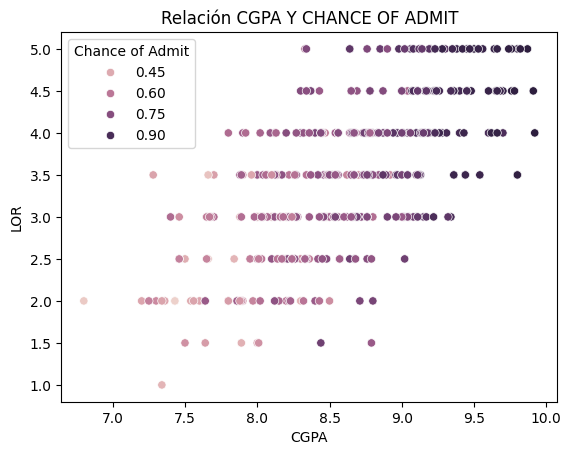

In [ ]:
sns.scatterplot(x='CGPA', y='LOR', hue='Chance of Admit', data=data)
plt.title("Relación CGPA Y CHANCE OF ADMIT")
plt.show()


In [ ]:
# frecuencia = data['Chance of Admit '].value_counts(ascending=True)
# frecuencia

<ipython-input-8-0165ba7dd72e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')


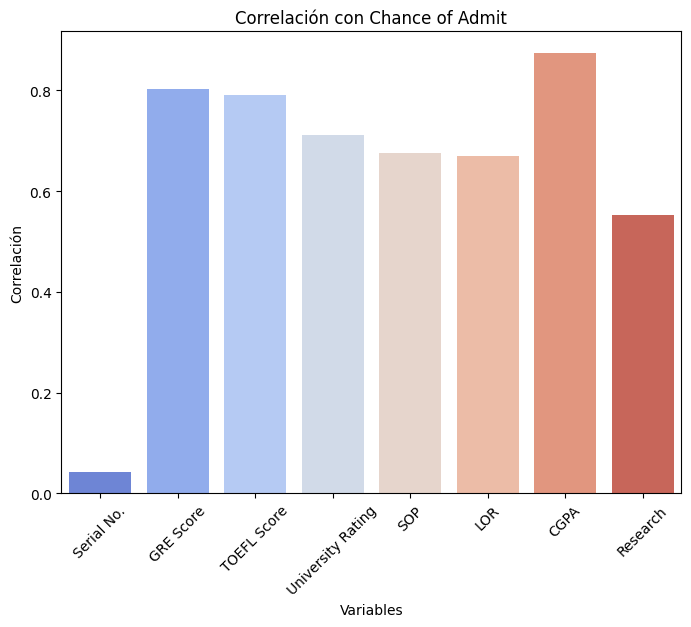

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tu DataFrame se llama df y que ya tienes la matriz de correlación calculada
correlation_matrix = data.corr()

# Extraer las correlaciones con 'Chance of Admit'
correlations = correlation_matrix['Chance of Admit'].drop('Chance of Admit')

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')
plt.title('Correlación con Chance of Admit')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.xticks(rotation=45)
plt.show()


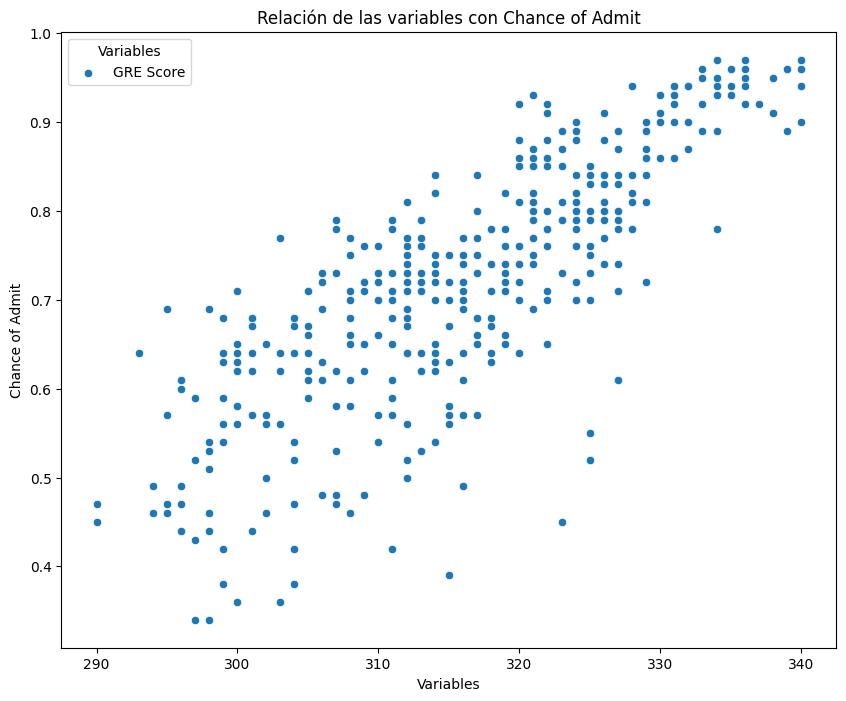

In [ ]:
# Seleccionar las variables con mayor correlación con 'Chance of Admit'
variables = ['GRE Score', ]

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 8))
for var in variables:
    sns.scatterplot(x=data[var], y=data['Chance of Admit'], label=var)

plt.title('Relación de las variables con Chance of Admit')
plt.xlabel('Variables')
plt.ylabel('Chance of Admit')
plt.legend(title="Variables")
plt.show()


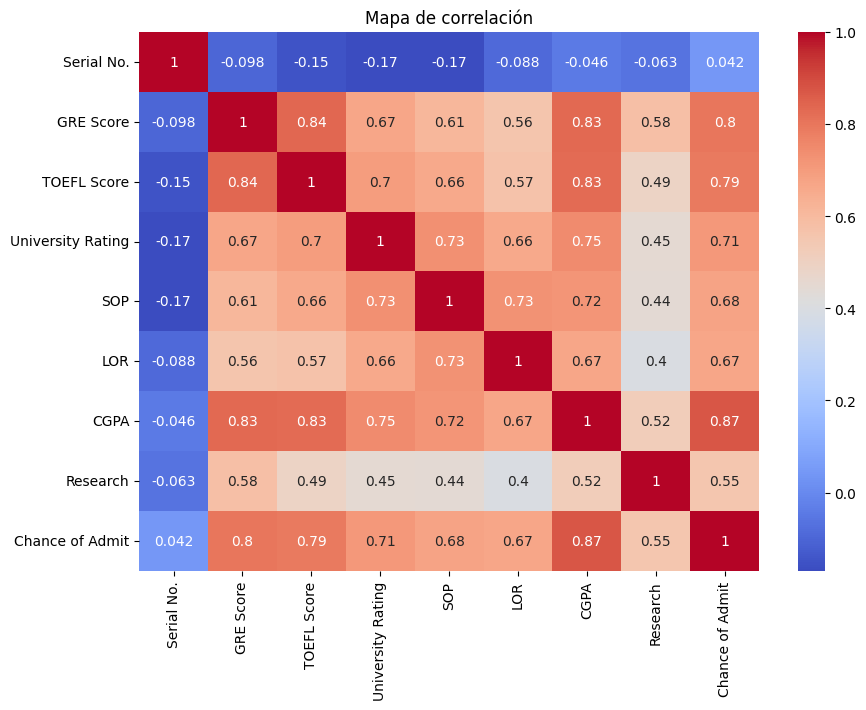

In [ ]:
# Seleccionar solo columnas numéricas
numeric_cols = data.select_dtypes(include=['float64', 'int64'])

# Matriz de correlación
corr_matrix = numeric_cols.corr()

# Mapa de calor
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de correlación')
plt.show()

In [ ]:
# Preprocesamiento de datos
# Suprimir columna irrelevante
data = data.drop(columns=['Serial No.'])


# Características y variable objetivo
X = data.drop(columns=['Chance of Admit'])
y = data['Chance of Admit']

# Normalizar características
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjuntos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Entrenar el modelo de regresión
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:\nMSE: {mse:.4f}\nR2 Score: {r2:.4f}")


Model Evaluation:
MSE: 0.0046
R2 Score: 0.8212


In [ ]:
# Predicción para un nuevo alumno
new_student = np.array([[330, 115, 5, 5, 5, 9.8, 1]])  # Example input
new_student_scaled = scaler.transform(new_student)
prediction = model.predict(new_student_scaled)
print(f"\nPredicted Chance of Admission for New Student: {prediction[0]:.2f}")



Predicted Chance of Admission for New Student: 0.96


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Analizar la influencia del GRE y el TOEFL
coefficients = pd.DataFrame({'Feature': data.columns[:-1], 'Coefficient': model.coef_})
print("\nFeature Importance:\n", coefficients.sort_values(by='Coefficient', ascending=False))



Feature Importance:
              Feature  Coefficient
5               CGPA     0.357768
0          GRE Score     0.093125
1        TOEFL Score     0.076263
4                LOR     0.063081
2  University Rating     0.029510
6           Research     0.022227
3                SOP    -0.001171


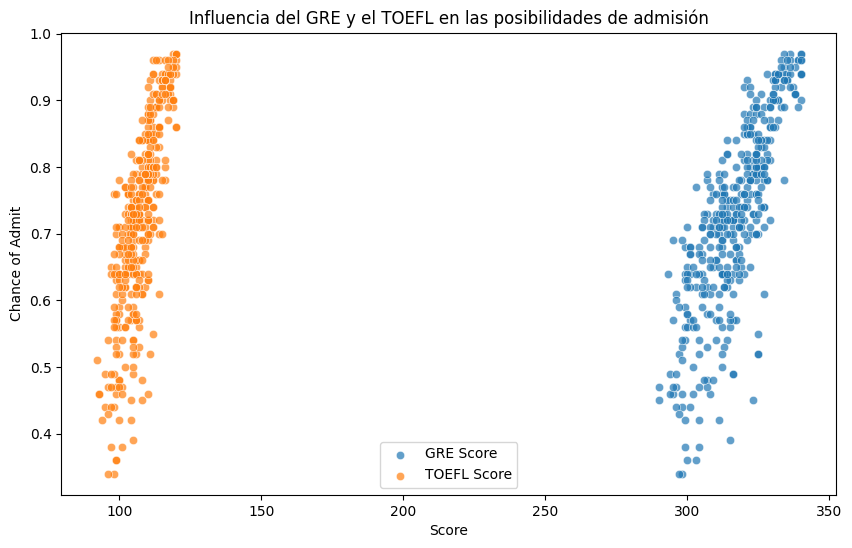

In [ ]:
# Visualización del efecto GRE y TOEFL
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['GRE Score'], y=data['Chance of Admit'], label='GRE Score', alpha=0.7)
sns.scatterplot(x=data['TOEFL Score'], y=data['Chance of Admit'], label='TOEFL Score', alpha=0.7)
plt.title('Influencia del GRE y el TOEFL en las posibilidades de admisión')
plt.xlabel('Score')
plt.ylabel('Chance of Admit')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind  # Asegúrate de importar ttest_ind
# Separar los grupos según la variable Research
group_0 = data[data['Research'] == 0]['Chance of Admit']
group_1 = data[data['Research'] == 1]['Chance of Admit']

# Realizar el test t de Student
t_stat, p_value = ttest_ind(group_0, group_1)

# Mostrar los resultados
print("Test de medias para 'Chance of Admit' según 'Research'")
print(f"Media sin Research (0): {group_0.mean():.4f}")
print(f"Media con Research (1): {group_1.mean():.4f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-valor: {p_value:.4f}")

if p_value < 0.05:
    print("Conclusión: Hay una diferencia significativa en las medias entre los dos grupos.")
else:
    print("Conclusión: No hay una diferencia significativa en las medias entre los dos grupos.")


Test de medias para 'Chance of Admit' según 'Research'
Media sin Research (0): 0.6377
Media con Research (1): 0.7960
T-statistic: -13.2482
P-valor: 0.0000
Conclusión: Hay una diferencia significativa en las medias entre los dos grupos.


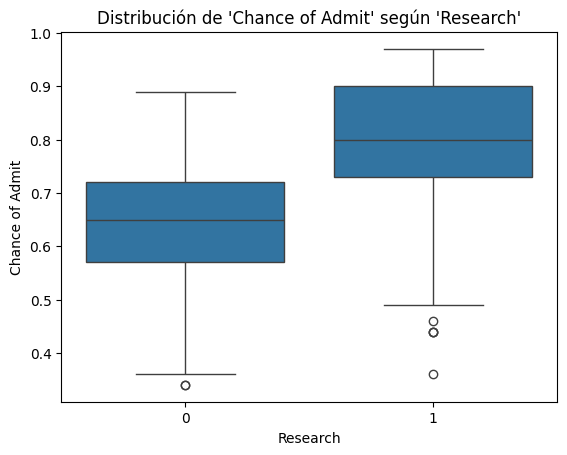

In [ ]:
sns.boxplot(x='Research', y='Chance of Admit', data=data)
plt.title("Distribución de 'Chance of Admit' según 'Research'")
plt.xlabel("Research")
plt.ylabel("Chance of Admit")
plt.show()

# **Conclusiones**

1. Existe una fuerte relación positiva entre los puntajes de GRE y TOEFL con la probabilidad de admisión (Chance of Admit).
A medida que los puntajes aumentan, también aumenta la probabilidad de ser admitido.
Distribución consistente:

2. Los datos muestran que los estudiantes con puntajes altos en GRE (alrededor de 330-350) y TOEFL (110-120) tienen una alta probabilidad de admisión cercana al 1 (100%).
3. Por otro lado, puntajes bajos en GRE y TOEFL están asociados con menores probabilidades de admisión.
4.La CGPA (promedio acumulado de calificaciones) tiene la correlación más alta con la probabilidad de admisión (Chance of Admit), siendo el factor más importante. Los puntajes de GRE Score y TOEFL Score también tienen una correlación muy alta, lo que indica que son factores clave en el proceso de admisión
5. La investigación parece estar fuertemente asociada con una mayor probabilidad de admisión. Esto sugiere que los estudiantes con experiencia en investigación tienen una ventaja notable en el proceso de admisión. Es importante considerar este hallazgo al analizar factores de éxito en la admisión universitaria.
